In [174]:
# %%
import torch
from torch import nn
import pdb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
%matplotlib inline

from scipy.stats import norm, uniform

def normal_distribution(n, mean, var=0.05):
  x = norm.pdf(np.arange(0, 1, 1.0 / n), mean, var)
  x = x / np.sum(x)
  return torch.tensor(x).float()

def precision(distribution):
    assert len(distribution.shape) == 1, "distribution must be 1D"
    l = distribution.shape[0]
    minval = distribution.min()
    maxval = distribution.max()
    range = (maxval - minval)
    #print(minval)
    #print(maxval)
    #print("range ", range.item())

def cum_diff(distribution):
    return (distribution[1:] - distribution[:-1]).abs().sum().item()
    
def plot_distribution(d):
    plt.figure()
    plt.plot(d)
    plt.show()

def plot(title, x, y):
    plt.figure()
    plt.title(title)
    plt.plot(x, y)
    plt.show()


# Analyze cumulative difference

## normal(resolution=various, mean=0.5, var=0.05)

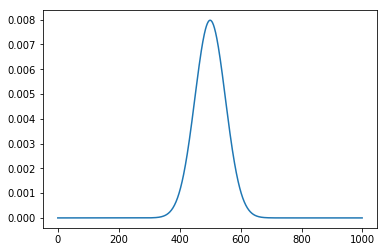

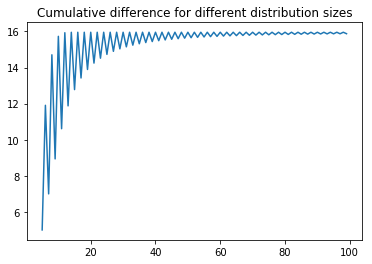

Limit value  15.957692638039589


In [52]:
def distribution(i):
    return normal_distribution(i, 0.5)

def d(i):
    return cum_diff(distribution(i)) * i

def experiment(range=np.arange(5.0, 100.0, 1.0)):
    plot_distribution(distribution(1000).numpy())
    plot("Cumulative difference for different distribution sizes", range, [d(i) for i in range])
    print("Limit value ", d(1000))

experiment()

## sum(normal(resolution=various, mean=[2 values], var=0.05))/2

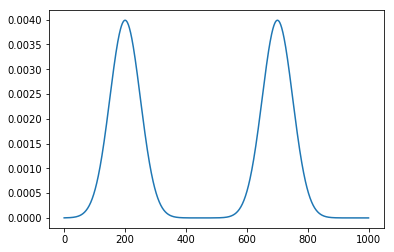

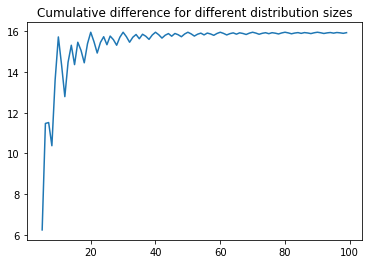

Limit value  15.956535935401917


In [53]:
def distribution(i):
    return (normal_distribution(i, 0.7) + normal_distribution(i, 0.2)) / 2.0

experiment()

## sum(normal(resolution=various, mean=[3 overlapping values], var=0.05))/3

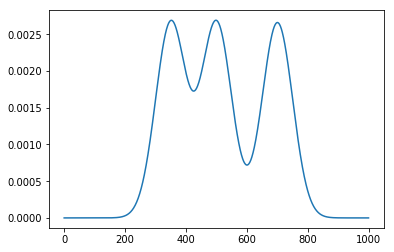

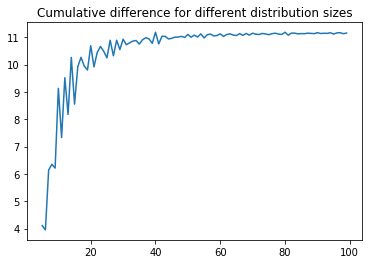

Limit value  11.192048899829388


In [54]:
def distribution(i):
    return (normal_distribution(i, 0.35) + normal_distribution(i, 0.5) + normal_distribution(i, 0.7)) / 3.0

experiment()

## normal(resolution=100, mean=0.5, var=various)

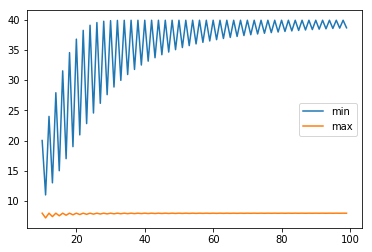

60.0
39.828901290893555
7.978761792182922
60.0
39.89422917366028
7.978811860084534


In [170]:
resolution = 1000
var_min = 0.02
var_max = 0.1

def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var)

def d(resolution, var):
    return cum_diff(distribution(resolution, var)) * resolution

def experiment1(range=np.arange(0.01, 1.0, 0.001)):
    plot_distribution(distribution(0.05).numpy())
    plot_distribution(distribution(0.1).numpy())
    plot("Cumulative difference for different distribution variance values", range, [d(i) for i in range])
    print("var=0.00001 ", d(0.00001))
    print("var=0.02 ", d(0.02))
    print("var=0.05 ", d(0.05))
    print("var=0.1 ", d(0.1))
    print("var=0.5 ", d(0.5))
    print("var=1.0 ", d(1.0))
    print("var=2.0 ", d(2.0))

def experiment():
    resolution = 10
    var_min_d = []
    var_max_d = []
    rs = []
    while resolution < 100:
        rs.append(resolution)
        var_min_d.append(d(resolution, var_min))
        var_max_d.append(d(resolution, var_max))
        resolution += 1
        
    plt.figure()
    plt.plot(rs, var_min_d, label='min')
    plt.plot(rs, var_max_d, label='max')
    plt.legend()
    plt.show()

    print(d(30, 0.005))

    print(d(30, 0.02))
    print(d(30, 0.1))

    print(d(30, 0.005))
    print(d(100, 0.02))
    print(d(100, 0.1))


experiment()

- Max value for d() for single gaussian is 2 * resolution, i.e. sum(0 - 1, 1 - 0) * resolution, 200 for resolution 100
- Min value for d() is will be 0 for inf var, i.e. flat
- Max theoratical value for d(): sum can be at most = resolution-1, so d() would be resolution * resolution-1, 9900 for resolution 100

variance bertween 0.02 and 0.1 seems like a reasonble range - curve not too sharp, not too flat - for 100 resolution. Maybe lower resolution might not allow for same range.

Between resolution 30 to 100, d(0.02) and d(0.1) remain stable at values 40 and 8, reaching value 60 at very sharp curves. 

What about mixture of gaussian? random noise?


# Precision d()

1 gaussian


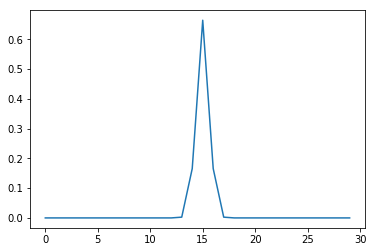

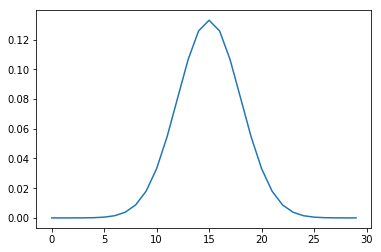

0.02510739490389824
0.1253308653831482

2 gaussians


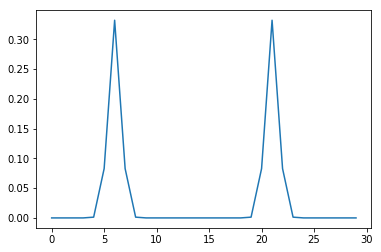

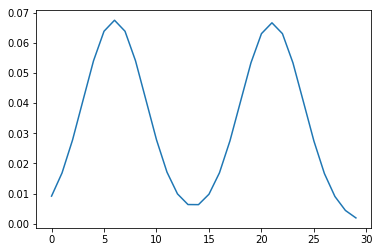

0.02510739676654339
0.12849698960781097

3 gaussians


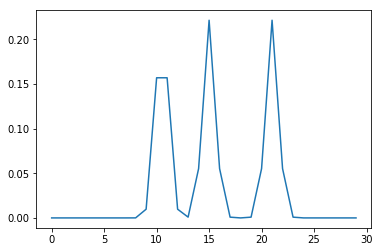

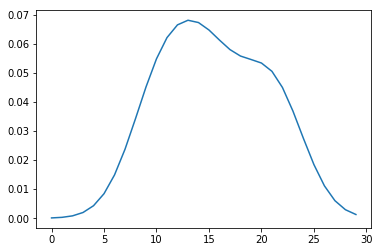

0.027846302837133408
0.24653398990631104

uniform


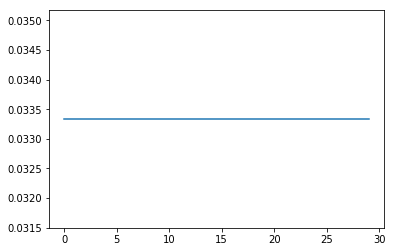

nan

linear slight slope


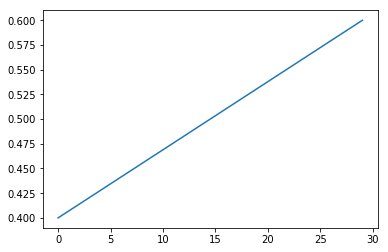

0.5000000596046448

linear large slope


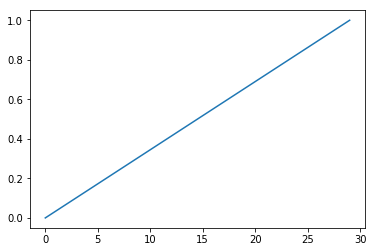

0.4999999701976776

1 gaussians scaled up by 10


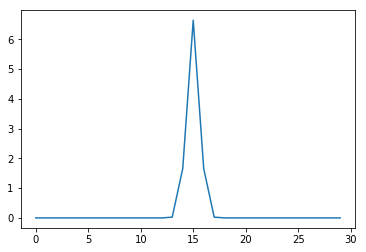

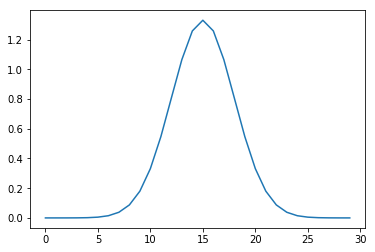

0.02510739490389824
0.1253308802843094

1 gaussians moved up by 10


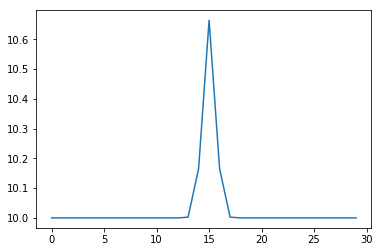

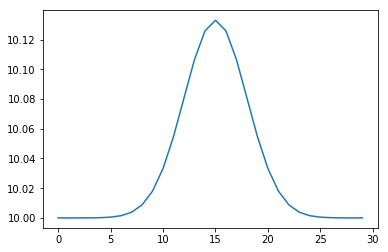

0.02510741353034973
0.12532936036586761

1 slightly noisy gaussian


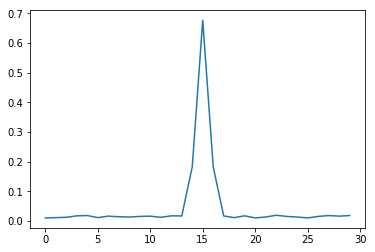

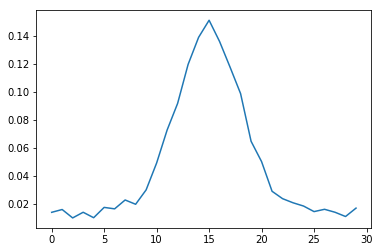

0.026622174307703972
0.11689317971467972

1 medium noisy gaussian


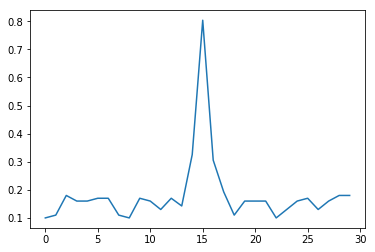

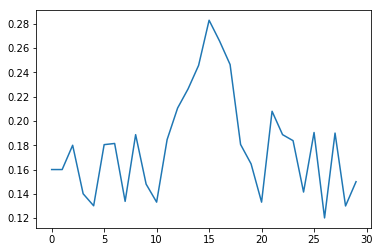

0.03588099405169487
0.05996791645884514

1 highly noisy gaussian


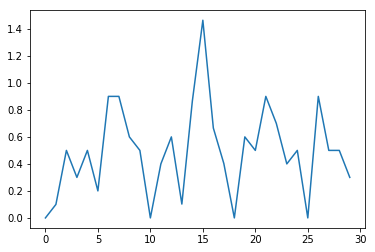

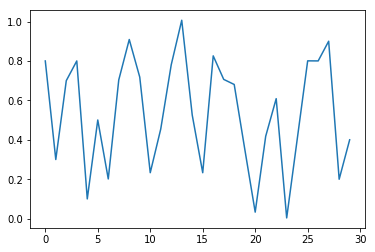

0.04098571836948395
0.05143660306930542

1 slightly noisy uniform


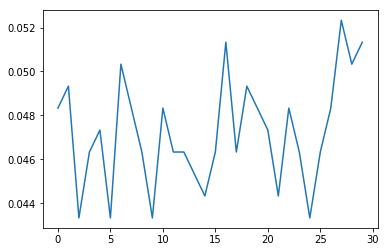

0.033333323895931244

1 highly noisy uniform


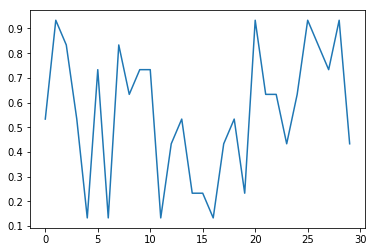

0.05018726736307144

slightly noisy linear


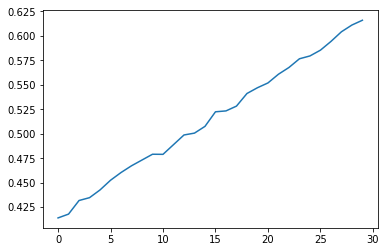

0.5001294016838074

medium noisy linear


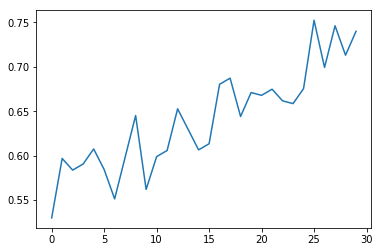

0.12032492458820343

highly noisy linear


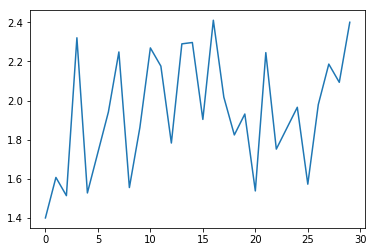

0.049252353608608246



In [241]:
resolution = 30

def cum_diff(distribution):
    return (distribution[1:] - distribution[:-1]).abs().sum().item()

def d(resolution, var):
    s = distribution(resolution, var)
    return (((s - s.min()).sum()) / (cum_diff(s) * resolution)).item()

print("1 gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var)

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("2 gaussians")
def distribution(resolution, var):
    return (normal_distribution(resolution, 0.7, var) + normal_distribution(resolution, 0.2, var)) / 2.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("3 gaussians")
def distribution(resolution, var):
    return (normal_distribution(resolution, 0.35, var) + normal_distribution(resolution, 0.5, var) + normal_distribution(resolution, 0.7, var)) / 3.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("linear slight slope")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution)

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("linear large slope")
def distribution(resolution, var):
    return torch.linspace(0, 1, resolution)

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.1))
print()


print("1 gaussians scaled up by 10")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) * 10

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 gaussians moved up by 10")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + 10

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 slightly noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + torch.zeros(resolution).random_(10, 20) / 1000.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()


print("1 medium noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + torch.zeros(resolution).random_(10, 20) / 100.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 highly noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) - 1 + torch.zeros(resolution).random_(10, 20) / 10.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 slightly noisy uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution + torch.zeros(resolution).random_(10, 20) / 1000.0
plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("1 highly noisy uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution - 1 + torch.zeros(resolution).random_(10, 20) / 10.0
plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("slightly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 1000.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("medium noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 100.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("highly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 10.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()




We have a metric that seems to quantify precision well
- non-noisy simple shapes have low values, i.e. high precision
- adding noise reduces precision
- precision gets worse with more noise
- scale and translation invariant

Value of the metric still depends on resolution. Needs resolution of about 100 to work well in these cases.

# Precision

1 gaussian


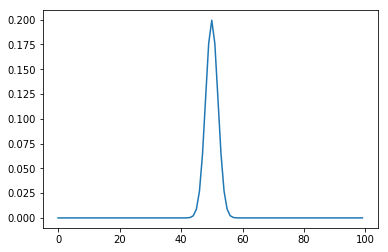

0.025066280737519264
0.1253300905227661

1 highly noisy gaussian


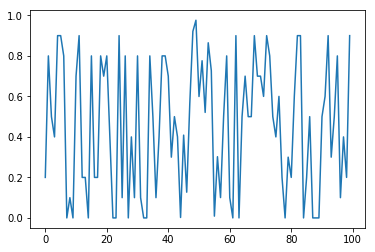

0.01612626016139984
0.013804595917463303

slightly noisy linear


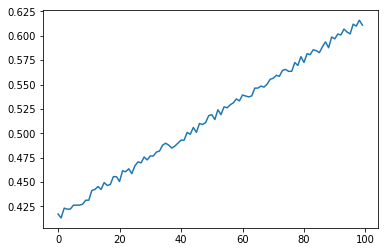

0.2784506380558014
0.28337234258651733

highly noisy linear


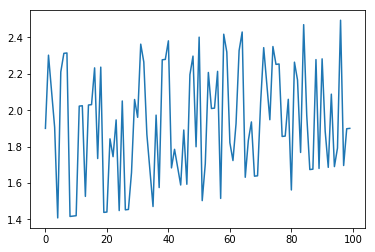

0.01535732764750719
0.019596148282289505



In [229]:
def cum_diff(distribution):
    return (distribution[1:] - distribution[:-1]).abs().sum().item()

def precision(resolution, var):
    s = distribution(resolution, var)
    return ((s - s.min()).sum() / (cum_diff(s) * resolution)).item()

print("1 gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var)

plot_distribution(distribution(resolution, 0.02).numpy())
print(precision(resolution, 0.02))
print(precision(resolution, 0.1))
print()

print("1 highly noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) - 1 + torch.zeros(resolution).random_(10, 20) / 10.0
plot_distribution(distribution(resolution, 0.02).numpy())
print(precision(resolution, 0.02))
print(precision(resolution, 0.1))
print()


print("slightly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 1000.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(precision(resolution, 0.02))
print(precision(resolution, 0.1))
print()

print("highly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 10.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(precision(resolution, 0.02))
print(precision(resolution, 0.1))
print()




# Entropy good measure?

In [249]:
from math import log, e

def entropy(dist):
  distribution = dist / dist.max()
  ent = 0.

  # Compute entropy
  for i in distribution:
    if i >0.0001:
        ent -= i * log(i, e)

  return ent

resolution = 30


def d(resolution, var):
    s = distribution(resolution, var)
    return entropy(s).item()

results = {}

# print("1 gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var)

results["1g_0.02"] = d(resolution, 0.02)
results["1g_0.05"] = d(resolution, 0.05)

# print("2 gaussians")
def distribution(resolution, var):
    return (normal_distribution(resolution, 0.7, var) + normal_distribution(resolution, 0.2, var)) / 2.0

results["2g_0.02"] = d(resolution, 0.02)
results["2g_0.05"] = d(resolution, 0.05)

# print("3 gaussians")
def distribution(resolution, var):
    return (normal_distribution(resolution, 0.35, var) + normal_distribution(resolution, 0.5, var) + normal_distribution(resolution, 0.7, var)) / 3.0

results["3g_0.02"] = d(resolution, 0.02)
results["3g_0.05"] = d(resolution, 0.05)

# print("uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution

results["u"] = d(resolution, 0.02)

# print("linear slight slope")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution)

results["l1"] = d(resolution, 0.02)

# print("linear large slope")
def distribution(resolution, var):
    return torch.linspace(0, 1, resolution)

results["l2"] = d(resolution, 0.02)

# print("1 gaussians scaled up by 10")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) * 10

results["1g*10_0.02"] = d(resolution, 0.02)
results["1g*10_0.05"] = d(resolution, 0.05)

# print("1 gaussians moved up by 10")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + 10

results["1g+10_0.02"] = d(resolution, 0.02)
results["1g_+10_0.05"] = d(resolution, 0.05)

# print("1 slightly noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + torch.zeros(resolution).random_(10, 20) / 1000.0

results["1g_n1_0.02"] = d(resolution, 0.02)
results["1g_n1_0.05"] = d(resolution, 0.05)

# print("1 medium noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + torch.zeros(resolution).random_(10, 20) / 100.0

results["1g_n2_0.02"] = d(resolution, 0.02)
results["1g_n2_0.05"] = d(resolution, 0.05)

# print("1 highly noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) - 1 + torch.zeros(resolution).random_(10, 20) / 10.0

results["1g_n3_0.02"] = d(resolution, 0.02)
results["1g_n3_0.05"] = d(resolution, 0.05)

# print("1 slightly noisy uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution + torch.zeros(resolution).random_(10, 20) / 1000.0

results["u_n1"] = d(resolution, 0.02)

# print("1 highly noisy uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution - 1 + torch.zeros(resolution).random_(10, 20) / 10.0
results["u_n2"] = d(resolution, 0.02)

# print("slightly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 1000.0

results["l1_n1"] = d(resolution, 0.02)

# print("medium noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 100.0

results["l1_n2"] = d(resolution, 0.02)

# print("highly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 10.0

results["l1_n3"] = d(resolution, 0.02)

print(results)

results['1g_0.02'] < results['1g_0.05']

{'1g_0.02': 0.7355997562408447, '1g_0.05': 1.8795452117919922, '2g_0.02': 1.4711995124816895, '2g_0.05': 3.7591004371643066, '3g_0.02': 2.2363667488098145, '3g_0.05': 4.015649795532227, 'u': 0.0, 'l1': 4.37910795211792, 'l2': 7.231746196746826, '1g*10_0.02': 0.7355997562408447, '1g*10_0.05': 1.8795450925827026, '1g+10_0.02': 1.7180830240249634, '1g_+10_0.05': 0.6712967753410339, '1g_n1_0.02': 3.0264387130737305, '1g_n1_0.05': 5.179253101348877, '1g_n2_0.02': 9.173592567443848, '1g_n2_0.05': 9.964425086975098, '1g_n3_0.02': 6.558289051055908, '1g_n3_0.05': 6.746914386749268, 'u_n1': 2.4750423431396484, 'u_n2': 6.602221965789795, 'l1_n1': 4.267983436584473, 'l1_n2': 3.8784961700439453, 'l1_n3': 5.3381733894348145}


# Difference from univariate gaussian

1 gaussian


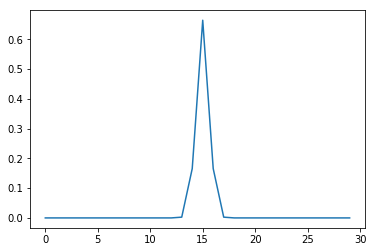

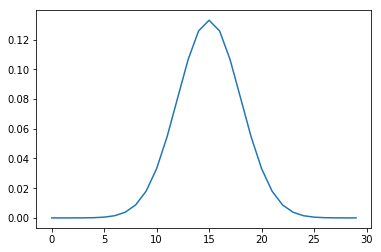

0.6190349658330281
1.0
0.7840699354807537

2 gaussians


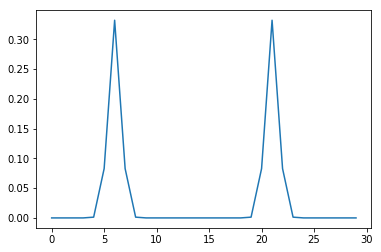

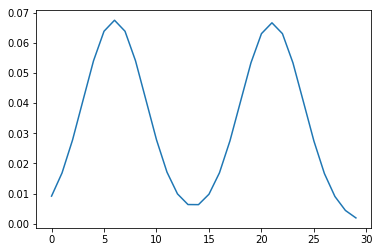

0.5434470971425375
0.17093205451965343

3 gaussians


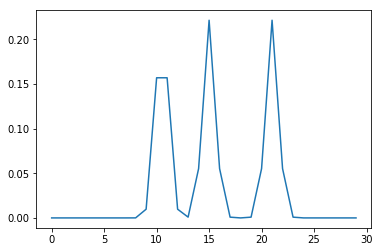

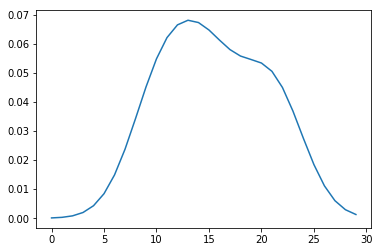

0.5117014646530151
0.15584603945414233

uniform


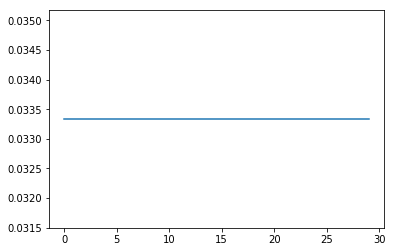

0.0

linear slight slope


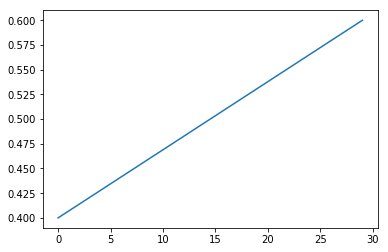

0.01946798960367835

linear large slope


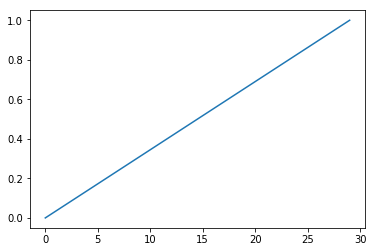

0.06320428848266613

1 gaussians scaled up by 10


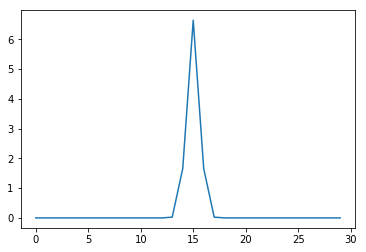

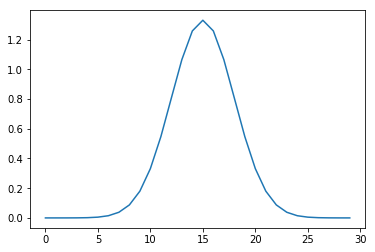

0.5873673756917318
0.8094309369723003

1 gaussians moved up by 10


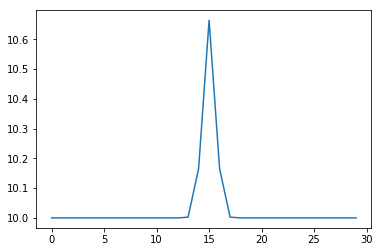

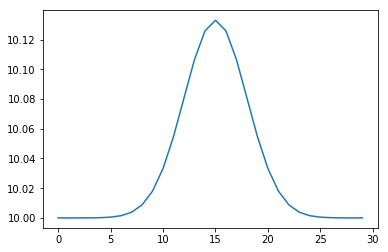

0.6190358797709148
0.7840739885965984

1 slightly noisy gaussian


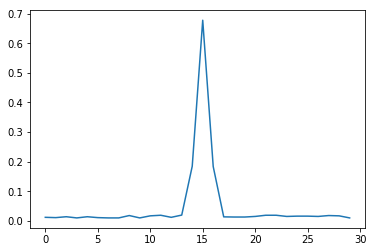

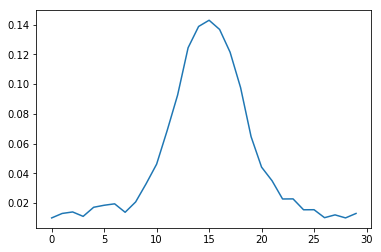

0.6370552778244019
0.6989051898320516

1 medium noisy gaussian


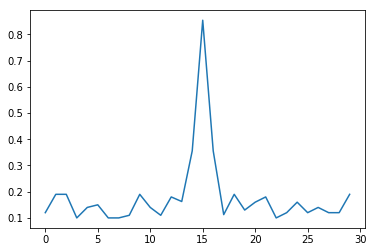

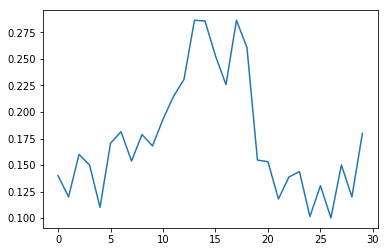

0.6505786577860515
0.43036011854807543

1 highly noisy gaussian


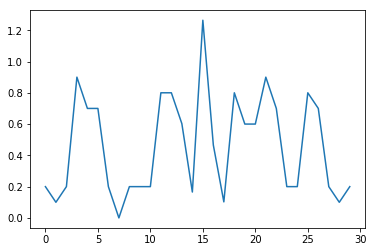

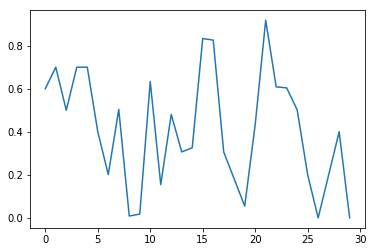

0.29694620768229163
0.05634625752766931

1 slightly noisy uniform


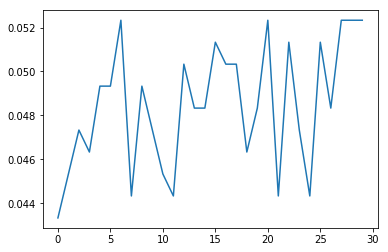

0.0

1 highly noisy uniform


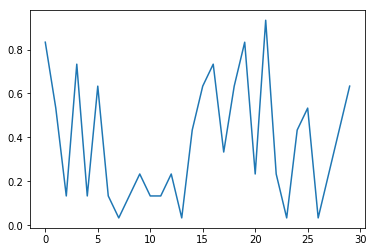

0.0

slightly noisy linear


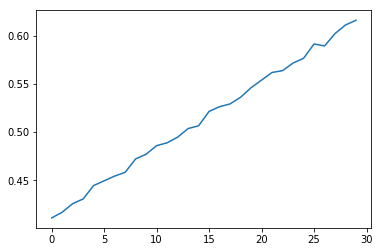

0.05553348859151208

medium noisy linear


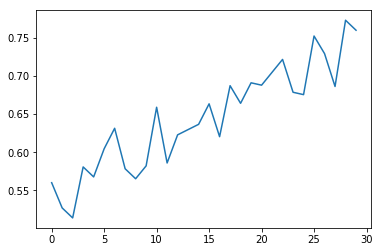

0.04102921485900879

highly noisy linear


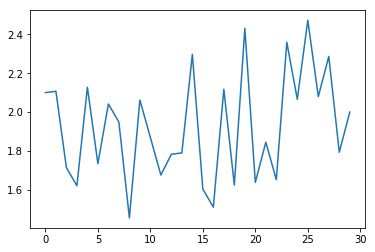

0.0



In [270]:
resolution = 30

def d(resolution, var):
    s = distribution(resolution, var)
    s = (s + 0.01 - s.min())
    s = s / s.max()
    #print('s')
    #plot_distribution(s.numpy())
    (maxval, index) = s.max(0)

    gaussian = normal_distribution(resolution, index.double() / resolution, 0.07)
    gaussian = (gaussian + 0.01 - gaussian.min())
    gaussian = gaussian / gaussian.max()

    #print('gaussian')
    #plot_distribution(gaussian.numpy())

    #print('gaussian - s')
    #plot_distribution((gaussian - s).numpy())

    diff = (gaussian - s).abs().sum().item() / resolution
    #print('diff = ', diff)
    cutoff = 0.4
    if diff > cutoff:
        diff = 1.0
    else:
        diff = diff / cutoff
    #print('diff2 = ', diff)

    conf = 1.0 - diff
    #print('conf1 = ', conf)
    
    return conf

print("1 gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var)

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.07))
print(d(resolution, 0.1))
print()

print("2 gaussians")
def distribution(resolution, var):
    return (normal_distribution(resolution, 0.7, var) + normal_distribution(resolution, 0.2, var)) / 2.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("3 gaussians")
def distribution(resolution, var):
    return (normal_distribution(resolution, 0.35, var) + normal_distribution(resolution, 0.5, var) + normal_distribution(resolution, 0.7, var)) / 3.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("linear slight slope")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution)

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("linear large slope")
def distribution(resolution, var):
    return torch.linspace(0, 1, resolution)

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.1))
print()


print("1 gaussians scaled up by 10")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) * 10

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 gaussians moved up by 10")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + 10

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 slightly noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + torch.zeros(resolution).random_(10, 20) / 1000.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()


print("1 medium noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) + torch.zeros(resolution).random_(10, 20) / 100.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 highly noisy gaussian")
def distribution(resolution, var):
    return normal_distribution(resolution, 0.5, var) - 1 + torch.zeros(resolution).random_(10, 20) / 10.0

plot_distribution(distribution(resolution, 0.02).numpy())
plot_distribution(distribution(resolution, 0.1).numpy())
print(d(resolution, 0.02))
print(d(resolution, 0.1))
print()

print("1 slightly noisy uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution + torch.zeros(resolution).random_(10, 20) / 1000.0
plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("1 highly noisy uniform")
def distribution(resolution, var):
    return torch.ones(resolution) / resolution - 1 + torch.zeros(resolution).random_(10, 20) / 10.0
plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("slightly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 1000.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("medium noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 100.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

print("highly noisy linear")
def distribution(resolution, var):
    return torch.linspace(0.4, 0.6, resolution) + torch.zeros(resolution).random_(10, 20) / 10.0

plot_distribution(distribution(resolution, 0.02).numpy())
print(d(resolution, 0.02))
print()

